In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
df = pd.read_csv("hypothyroid.csv")
df = df.replace(['?'],np.nan)
colind = [0,17,19,21,23,25,27]
for i in colind:
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i],downcast = "float")
names = df["Class"].value_counts().index.values
tmp=[]
for i in range(0,len(names)):
    if "_" in names[i]:
        ind = names[i].index("_")
        tmp.append(names[i][0:ind]+"\n"+names[i][ind+1:]) 
    else:
        tmp.append(names[i]) 
    names[i]=tmp[i]

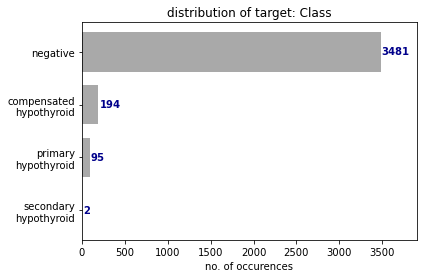

In [3]:
x = np.flip(names)
y = np.flip(df["Class"].value_counts())
width = 0.75
# plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots()

ind = np.arange(len(y))
ax.barh(ind, y, width, color="darkgray")
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.xlim(right=3900)
plt.title('distribution of target: Class')
plt.xlabel('no. of occurences')
# plt.ylabel('y')      
for i, v in enumerate(y):
    ax.text(v + 10, i-0.05, str(v), color='darkblue', fontweight='bold')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float32
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Text(0.5, 1.0, 'Boxplots of different numeric attributes')

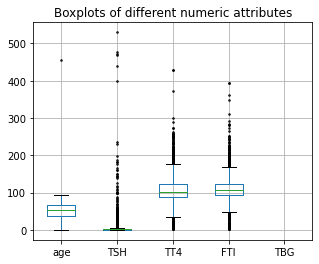

In [9]:
colind = [0,17,21,25,27]
namelist = list(df.iloc[:,colind].columns)
plt.figure(figsize=(5,4))
box = df.boxplot(namelist,whis=1.5,flierprops=dict(marker='.', markersize = 3))
plt.title(label = "Boxplots of different numeric attributes")

Text(0.5, 1.0, 'Boxplot of T3 & T4U levels')

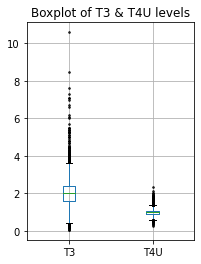

In [10]:
colind2 = [19,23]
namelist = list(df.iloc[:,colind2].columns)
namelist
plt.figure(figsize=(3,4))
box = df.boxplot(namelist,whis=1.5,flierprops=dict(marker='.', markersize = 3))
plt.title(label = "Boxplot of T3 & T4U levels")

Text(0.5, 0.98, 'Histograms of different numeric attributes')

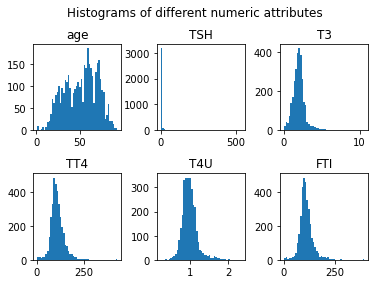

In [11]:
colind = [0,17,19,21,23,25]
df2 = df.replace(455.0,np.nan) # eliminating outlier in age
namelist = list(df2.iloc[:,colind].columns)
fig, axes = plt.subplots(2,3)
fig.subplots_adjust(top=0.85,bottom = 0.1,wspace = 0.4,hspace = 0.5)
ind = 0
for i in range(2):
    for j in range(3):
        if ind < 6:
            axes[i,j].hist(df2[namelist[ind]], bins=50)
            axes[i,j].set_title(label = namelist[ind])
        ind+=1
fig.suptitle("Histograms of different numeric attributes")